In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [8]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [9]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [11]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [ ]:
# TRain test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [16]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot: >

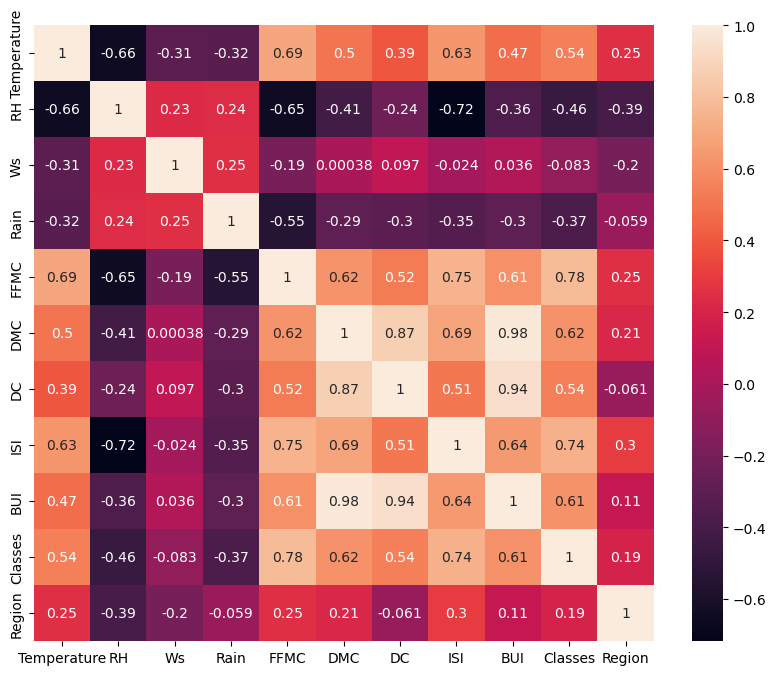

In [20]:
plt.figure(figsize=(10,8))
corr = X_train.corr()
sns.heatmap(corr , annot=True)

In [21]:
corr.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr          

In [23]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [24]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [ ]:
# Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_2062/1383933056.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

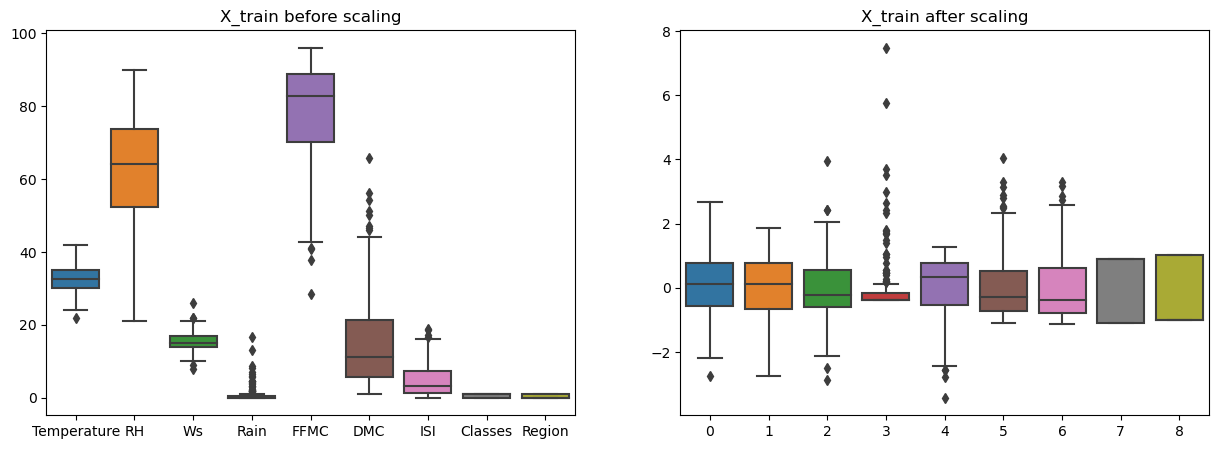

In [28]:
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
regressor = LinearRegression()

In [31]:
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(X_test_scaled)

In [33]:
mae = mean_squared_error(y_test, y_pred)
mae

0.6742766873791607

In [34]:
score = r2_score(y_test, y_pred)
score

0.9847657384266951

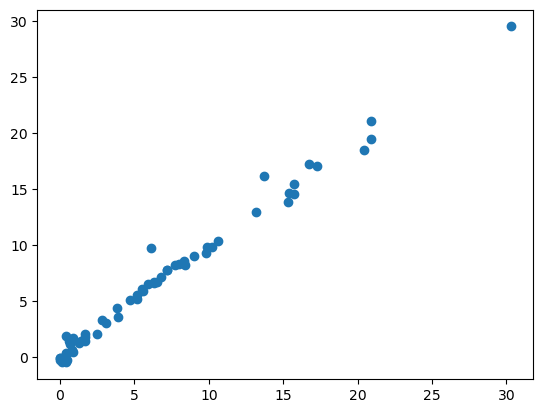

In [35]:
plt.scatter(y_test, y_pred)

In [36]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error: 2.2483458918974772    , mean_absolute_error: 0.9492020263112388


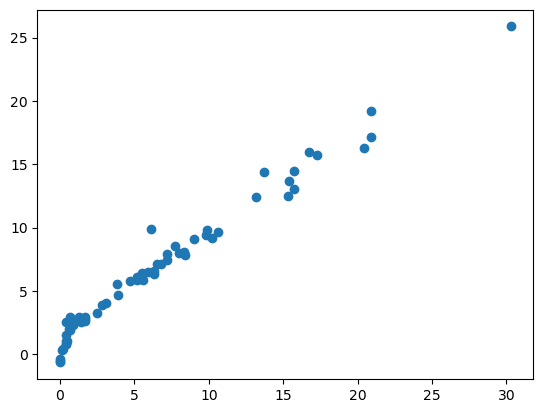

In [40]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'mean_squared_error: {mae}    , R2Score: {score}') 
plt.scatter(y_test, y_pred)

In [41]:
from sklearn.linear_model import LassoCV

In [42]:
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

mean_squared_error: 0.7924995554743627    , mean_absolute_error: 0.9820946715928275


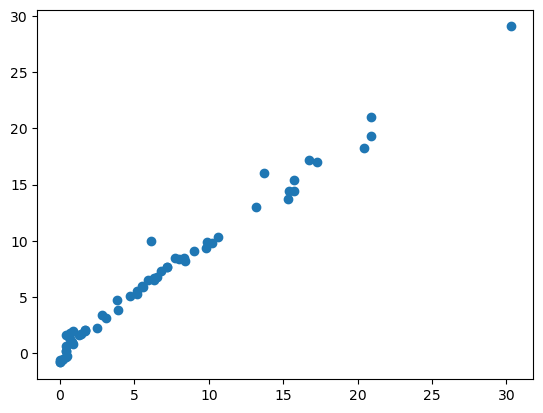

In [46]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'mean_squared_error: {mae}    , R2Score: {score}') 

mean_squared_error: 0.6949198918152074    , mean_absolute_error: 0.9842993364555513


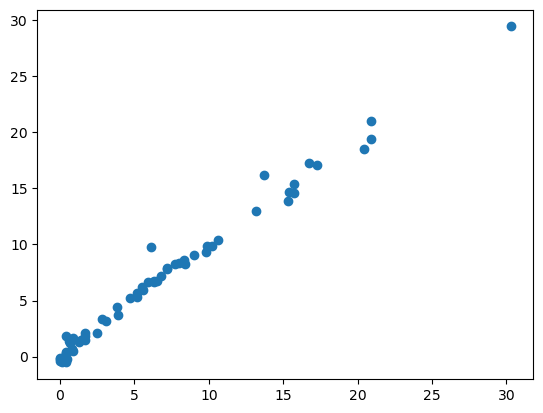

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'mean_squared_error: {mae}    , R2Score: {score}') 
plt.scatter(y_test, y_pred)

mean_squared_error: 0.6949198918152074    , mean_absolute_error: 0.9842993364555513


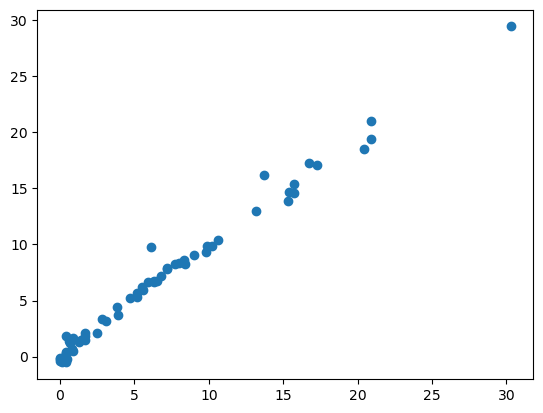

In [49]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'mean_squared_error: {mae}    , R2Score: {score}') 
plt.scatter(y_test, y_pred)

In [51]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

mean_squared_error: 5.5172511010252245    , mean_absolute_error: 0.8753460589519703


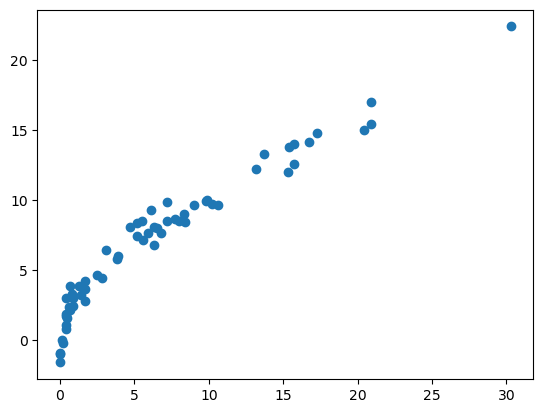

In [54]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred = elastic_net.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'mean_squared_error: {mae}    , R2Score: {score}') 
plt.scatter(y_test, y_pred)

mean_squared_error: 0.8222830416276258    , R2Score: 0.9814217587854941


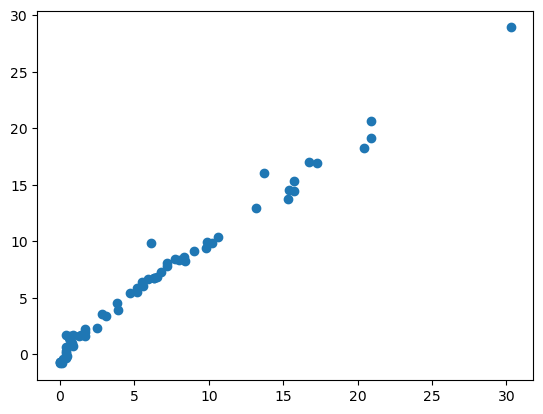

In [57]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scaled,y_train)
y_pred = elastic_net_cv.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'mean_squared_error: {mae}    , R2Score: {score}') 
plt.scatter(y_test, y_pred)

In [ ]:
# Pickeling of the machine learning model and preprossing model Standard Scaler

In [59]:
scaler

StandardScaler()

In [60]:
ridge

Ridge()

In [58]:
import pickle

In [61]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))